ML project

student name:-

1- Zaid Mohammed   Id :- 32109257008

2- Mohammed obidat Id:- 32109304005

3- Bayan shuibat Id:- 32209304004


**importing library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  , GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix ,roc_curve, auc # lil fly
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

dataset :- (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

The dataset is highly unbalanced, the positive class (frauds) account for
 0.172% of all transactions.

We have 492 frauds out of 284,807 transactions.

In [6]:
df = pd.read_csv("creditcard.csv")

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Check the class distribution
## &
## Plot the class distribution

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


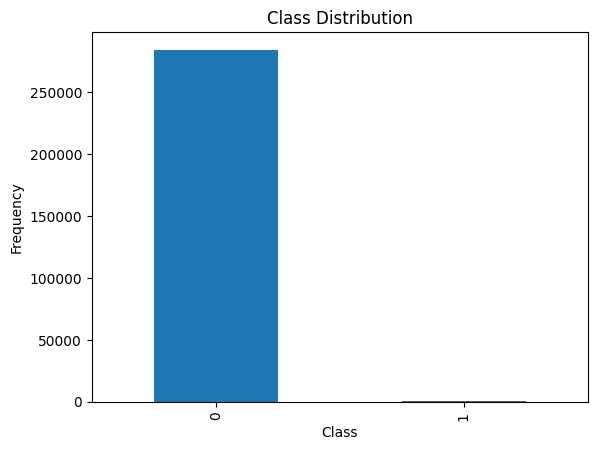

In [7]:

class_distribution = df['Class'].value_counts()
print("Class distribution:")
print(class_distribution)




class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**Check if there null value**

In [8]:
df.isnull().sum().sum()

0

**Check if there duplicated value**

In [9]:
df.duplicated().sum()

1081

why we choose to drop the duplicated ??
- the duplicated percent 0.03 %

**Drop the duplicated value**

In [10]:
df = df.drop_duplicates()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Separate features and target**

In [11]:
X = df.drop('Class', axis=1)   # independent var
y = df['Class'] # dependent var

**Split the data into training and testing sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Apply undersampling**

In [13]:
rus = RandomUnderSampler(random_state=42) #same random state to keep the same reproducible data
# Fitting and Resampling the Training Data
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

## Check the class distribution after underampling

In [14]:
print("Class distribution after undersampling:")
print(pd.Series(y_train_undersampled).value_counts()) # is used to convert y_train_undersampled into a pandas Series object
#can easily manipulate and analyze it using various pandas methods and functions

Class distribution after undersampling:
Class
0    339
1    339
Name: count, dtype: int64


**Apply oversampling**

In [15]:
# ovs --> oversampling
ovs = SMOTE(random_state=42) #same random state to keep the same reproducible data
# SMOTE --> based on the  K-Nearest Neighbors  (KNN) algorithm , its generate a new value for minority class based on Nearest Neighbors .
X_train_resampled, y_train_resampled = ovs.fit_resample(X_train_undersampled, y_train_undersampled)

**Check the class distribution after resampling**

In [16]:
print("Class distribution after resampling:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after resampling:
Class
0    339
1    339
Name: count, dtype: int64


why 356 ?? cus we make the fly duplicated from our data .

**Train and evaluate models**

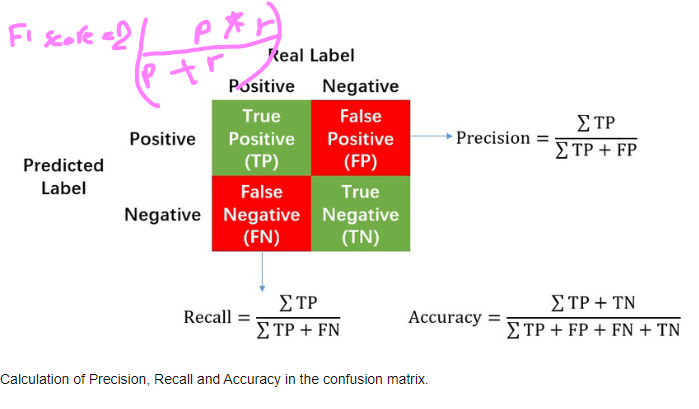

res = https://www.researchgate.net/figure/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix_fig3_336402347

In [17]:
def evaluate_model(model, X_test, y_test):
  # to be in the picture the " model " parameter represent the trained classifire
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # predicts the probabilities of the positive class



    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # calculates the Area Under the ROC Curve (AUC) score
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # here we use the f string
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC: {auc_score}")
    print(classification_report(y_test, y_pred))

    # calculates the False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    # In Python, the underscore _ is often used as a variable name when the value assigned to it is not going to be used in the subsequent code
    # we use an ai tool here to help us tho fix the problem we hade with the "_"



    plt.figure()
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

The F1 score achieves a balance between precision and recall. This is important, especially in cases of imbalanced classes where we have a large number of negative instances compared to positive instances

**Bagging (RandomForest)**

The primary goal of Bagging is to reduce variance

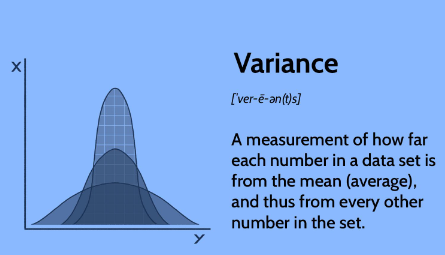

Random Forest performance:
Accuracy: 0.9738245729457929
Precision: 0.050643776824034335
Recall: 0.8805970149253731
F1 Score: 0.09577922077922078
AUC: 0.9745727817422348
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84984
           1       0.05      0.88      0.10       134

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.99     85118



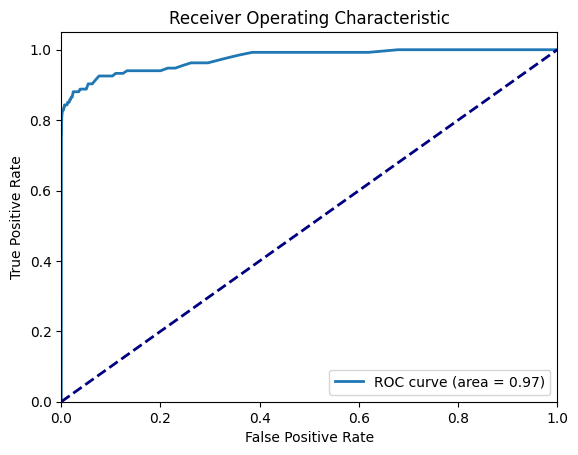

In [18]:
rf = RandomForestClassifier(random_state=42) #same random state to keep the same reproducible data
rf.fit(X_train_resampled, y_train_resampled) # comes from the oversampling
print("Random Forest performance:")
evaluate_model(rf, X_test, y_test)

**Boosting (XGBOOST )**

the idea behind Boosting is to iteratively build a strong model by learning from the mistakes of the previous models


In [19]:
def evaluate_xgmodel(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nAccuracy Score:")
    print(accuracy_score(y_test, y_pred))


xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)  #training

print("XGBoost performance:")
evaluate_xgmodel(xgb_model, X_test, y_test)

XGBoost performance:
Confusion Matrix:
[[81867  3117]
 [   13   121]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84984
           1       0.04      0.90      0.07       134

    accuracy                           0.96     85118
   macro avg       0.52      0.93      0.53     85118
weighted avg       1.00      0.96      0.98     85118


Accuracy Score:
0.963227519443596


**Hyperparameter tuning with GridSearchCV**

- cross-validation which splits the training data into several folds, trains the model on some folds, and validates it on the remaining fold
- Performance Optimization

difference between normal and hyper parameters :
- Parameters learn their own values from data
- hyperparameters do not learn their values from data

In [20]:
def optimize_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

**Random Forest hyperparameter tuning**

- constructing a multitude of decision trees during training and outputting the class that is the mode of the classes

Optimized Random Forest performance:
Accuracy: 0.9775840597758406
Precision: 0.05782652043868395
Recall: 0.8656716417910447
F1 Score: 0.10841121495327102
AUC: 0.9775372993827812
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84984
           1       0.06      0.87      0.11       134

    accuracy                           0.98     85118
   macro avg       0.53      0.92      0.55     85118
weighted avg       1.00      0.98      0.99     85118



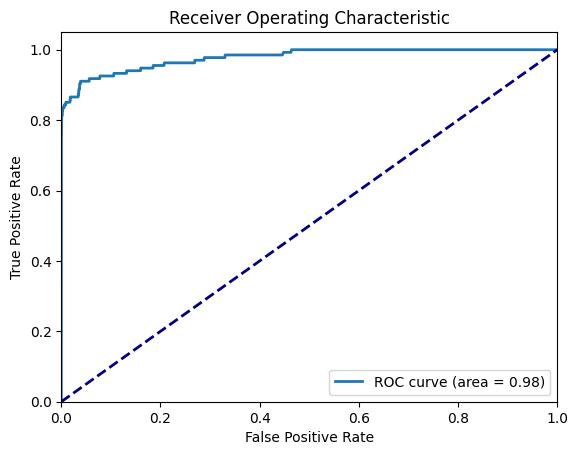

In [21]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
optimized_rf = optimize_model(RandomForestClassifier(random_state=42), rf_param_grid, X_train_resampled, y_train_resampled)
print("Optimized Random Forest performance:")
evaluate_model(optimized_rf, X_test, y_test)

**XGBoost hyperparameter tuning**

In [22]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

print("XGBoost performance with optimized parameters:")
evaluate_xgmodel(best_model, X_test, y_test)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
XGBoost performance with optimized parameters:
Confusion Matrix:
[[82158  2826]
 [   15   119]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84984
           1       0.04      0.89      0.08       134

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.53     85118
weighted avg       1.00      0.97      0.98     85118


Accuracy Score:
0.9666228059869828
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
